In [59]:
#import package
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#import warning
import warnings
warnings.filterwarnings('ignore')

#Importing Classifier
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn.model_selection import train_test_split

In [2]:
#import dataset
iris = pd.read_csv('./Dataset/iris.csv')

In [3]:
iris

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


In [4]:
#iris dataset summary
iris.describe()

,sepal.length,sepal.width,petal.length,petal.width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [5]:
#checking iris columns name
iris.columns

Index(['sepal.length', 'sepal.width', 'petal.length', 'petal.width',
       'variety'],
      dtype='object')

In [6]:
#checking iris columns type
iris.dtypes

sepal.length    float64
sepal.width     float64
petal.length    float64
petal.width     float64
variety          object
dtype: object

In [7]:
#checking variety unique values
iris.variety.unique()

array(['Setosa', 'Versicolor', 'Virginica'], dtype=object)

In [8]:
#checking iris shape
iris.shape

(150, 5)

In [9]:
#checking duplicated rows
iris.duplicated().any()

True

In [10]:
#checking rows that duplicated
iris[iris.duplicated()]

,sepal.length,sepal.width,petal.length,petal.width,variety
142,5.8,2.7,5.1,1.9,Virginica


In [11]:
#dropping duplicated rows
iris.drop_duplicates(inplace=True)
#check again
iris.duplicated().any()

False

In [12]:
#function to find Missing Value in every columns
def get_missing_value(df):
    mis_val = df.isnull().sum()
    tot_val = df.shape[0]
    mis_percentage = round((100 * mis_val / tot_val),2)
    miss_tab = pd.concat([mis_val, mis_percentage], axis=1)
    miss_tab_col_name = miss_tab.rename(columns = {0 : 'Row With Missing Value', 1 : 'Percentage (%)'})
    miss_tab_col_name = miss_tab_col_name.sort_values('Percentage (%)',ascending=False)
    return miss_tab_col_name

In [13]:
#checking dataset missing row/values
get_missing_value(iris)

,Row With Missing Value,Percentage (%)
sepal.length,0,0.0
sepal.width,0,0.0
petal.length,0,0.0
petal.width,0,0.0
variety,0,0.0


In [14]:
correlation = iris.corr()
correlation

,sepal.length,sepal.width,petal.length,petal.width
sepal.length,1.000000,-0.118129,0.873738,0.820620
sepal.width,-0.118129,1.000000,-0.426028,-0.362894
petal.length,0.873738,-0.426028,1.000000,0.962772
petal.width,0.820620,-0.362894,0.962772,1.000000


<AxesSubplot:>

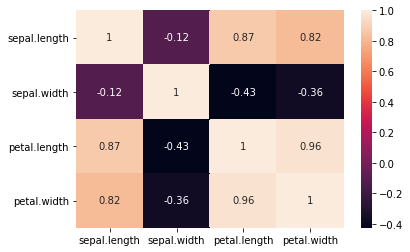

In [15]:
#changing correlation into a heatmap
sns.heatmap(correlation,annot=True)

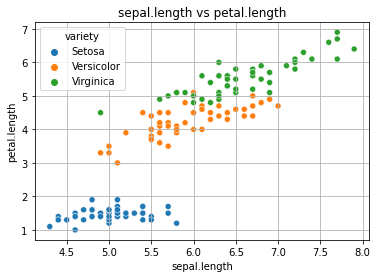

In [16]:
sns.scatterplot(x=iris['sepal.length'],y=iris['petal.length'],hue=iris['variety'])
plt.title('sepal.length vs petal.length')
plt.xlabel('sepal.length')
plt.ylabel('petal.length')
plt.grid()
plt.show()

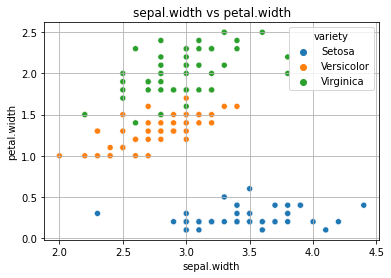

In [17]:
sns.scatterplot(x=iris['sepal.width'],y=iris['petal.width'],hue=iris['variety'])
plt.title('sepal.width vs petal.width')
plt.xlabel('sepal.width')
plt.ylabel('petal.width')
plt.grid()
plt.show()

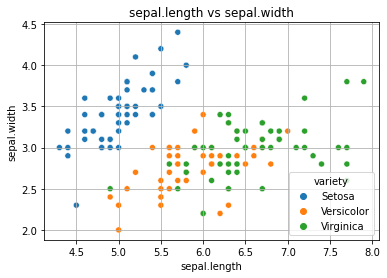

In [18]:
sns.scatterplot(x=iris['sepal.length'],y=iris['sepal.width'],hue=iris['variety'])
plt.title('sepal.length vs sepal.width')
plt.xlabel('sepal.length')
plt.ylabel('sepal.width')
plt.grid()
plt.show()

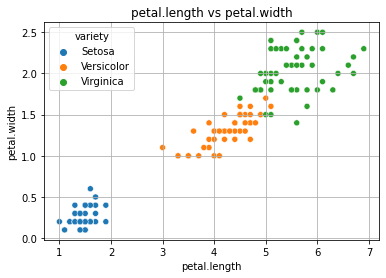

In [19]:
sns.scatterplot(x=iris['petal.length'],y=iris['petal.width'],hue=iris['variety'])
plt.title('petal.length vs petal.width')
plt.xlabel('petal.length')
plt.ylabel('petal.width')
plt.grid()
plt.show()

<AxesSubplot:xlabel='variety', ylabel='count'>

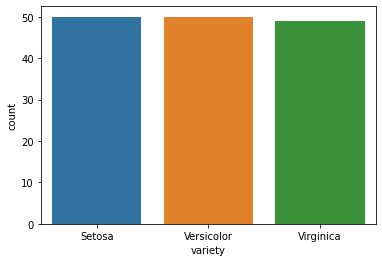

In [20]:
#checking variety
sns.countplot(iris['variety'])

In [21]:
iris['variety'].value_counts()

Versicolor    50
Setosa        50
Virginica     49
Name: variety, dtype: int64

Text(0.5, 1.0, 'petal.length')

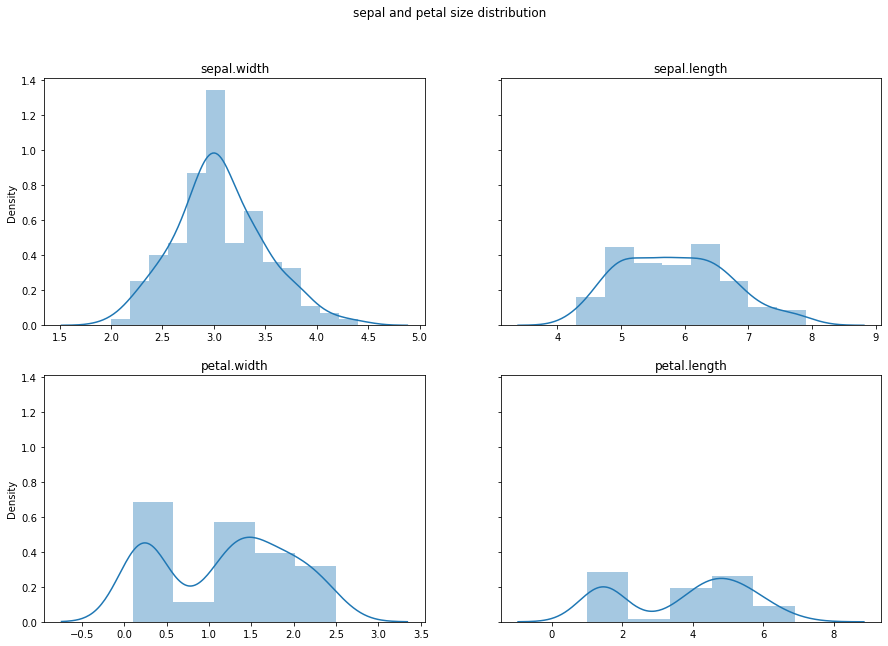

In [22]:
#checking sepal and petal size distribution
fig, axes = plt.subplots(2, 2, figsize=(15, 10), sharey=True)
fig.suptitle('sepal and petal size distribution')

# Sepal Width
sns.distplot(ax=axes[0,0], x=iris['sepal.width'])
axes[0,0].set_title('sepal.width')

# Sepal Length
sns.distplot(ax=axes[0,1], x=iris['sepal.length'])
axes[0,1].set_title('sepal.length')

# Petal Width
sns.distplot(ax=axes[1,0], x=iris['petal.width'])
axes[1,0].set_title('petal.width')

# Petal Length
sns.distplot(ax=axes[1,1], x=iris['petal.length'])
axes[1,1].set_title('petal.length')

In [23]:
#Label Encoding for categorical features
for i in iris[iris.dtypes[iris.dtypes == "object"].index].columns:
    le = LabelEncoder() 
    le.fit(list(iris[i].values)) 
    iris[i] = le.transform(list(iris[i].values))
iris

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [24]:
#splitting to validation and train data
X = iris.drop(['variety'],axis=1)
y = iris['variety']

#using train_test_split
X_train , X_val , y_train , y_val = train_test_split(X, y, test_size = 0.4, random_state = 10)

In [25]:
X

,sepal.length,sepal.width,petal.length,petal.width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [26]:
y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: variety, Length: 149, dtype: int64

In [38]:
def count_rmse_and_score(classifier):
    model = classifier()
    model.fit(X_train,y_train)
    pred = model.predict(X_val)
    RMSE = mean_squared_error(y_val,pred)
    SCORE = accuracy_score(y_val,pred)
    return RMSE,SCORE

In [41]:
count_RMSE(KNeighborsClassifier)

(0.05, 0.95)

In [42]:
count_RMSE(DecisionTreeClassifier)

(0.05, 0.95)

In [43]:
count_RMSE(RandomForestClassifier)

(0.05, 0.95)

In [44]:
count_RMSE(SVC)

(0.03333333333333333, 0.9666666666666667)

([0, 1, 2, 3],
 [Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, '')])

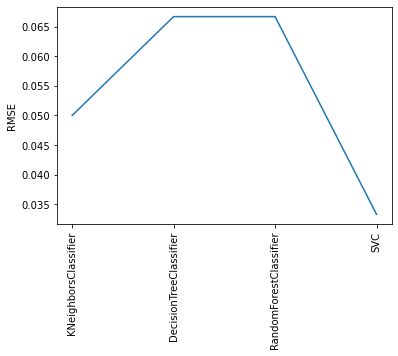

In [58]:
classifier = ['KNeighborsClassifier',
              'DecisionTreeClassifier',
              'RandomForestClassifier',
              'SVC']
RMSE_classifier = [count_RMSE(KNeighborsClassifier)[0],
                   count_RMSE(DecisionTreeClassifier)[0],
                   count_RMSE(RandomForestClassifier)[0],
                   count_RMSE(SVC)[0]]
plt.plot(classifier,RMSE_classifier)
plt.ylabel('RMSE')
plt.xticks(rotation=90)

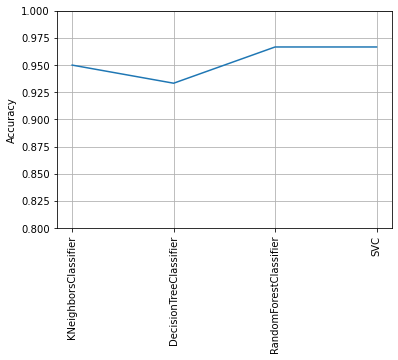

In [57]:
classifier = ['KNeighborsClassifier',
              'DecisionTreeClassifier',
              'RandomForestClassifier',
              'SVC']
acc_classifier = [count_RMSE(KNeighborsClassifier)[1],
                   count_RMSE(DecisionTreeClassifier)[1],
                   count_RMSE(RandomForestClassifier)[1],
                   count_RMSE(SVC)[1]]
plt.plot(classifier,acc_classifier)
plt.ylabel('Accuracy')
plt.ylim((0.8,1))
plt.xticks(rotation=90)
plt.grid()

In [48]:
#checking RMSE for KNeighborsClassifier with different n_neighbors
klist = list(range(1,50))
RMSE = []
for k in klist:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    knn_pred = knn.predict(X_val)
    knn_RMSE = mean_squared_error(y_val,knn_pred)
    RMSE.append(knn_RMSE)

In [49]:
Kneigbors_RMSE = pd.DataFrame({'klist':klist, 'RMSE': RMSE})

In [50]:
np.min(Kneigbors_RMSE)

klist    1.000000
RMSE     0.016667
dtype: float64